## 这是一个使用系统的demo


In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import datetime


from mysystem.utils.cleaner import Cleaner
from mysystem.engine import Engine
from strategy import MyStrategy
from mysystem.utils.plumber import Plumber

### 导入数据

In [2]:
daily = pl.read_ipc('./data/stk_daily.feather')
annotation = pl.read_ipc('./data/stk_fin_annotation.feather')
balance = pl.read_ipc('./data/stk_fin_balance.feather')
cashflow = pl.read_ipc('./data/stk_fin_cashflow.feather')
income = pl.read_ipc('./data/stk_fin_income.feather')
item_map = pl.read_ipc('./data/stk_fin_item_map.feather')

### 回测

回测的流程是：

- 创建辅助工具（包括一个数据清洗器和一个回测日志的解析器，用于分析展示回测结果）

 - 设置回测参数，一个是传入data，这里直接使用daily_data，用户可以自行传入数据，但是必须要包括每日的高开低收，可以有其他数据，engine会按照天的顺序依次推
送给策略；另外就是设置好回测起始日期，engine会自动识别

 - 将参数挂载给引擎并开始回测
 
 - 将回测的日志推送给解析器进行回测结果分析和展示

2023-12-13 21:46:43 LAPTOP-05NEQGN9 mysystem.engine[17320] INFO 正在初始化策略...
2023-12-13 21:46:43 LAPTOP-05NEQGN9 mysystem.engine[17320] INFO 重组市场数据...
2023-12-13 21:46:44 LAPTOP-05NEQGN9 mysystem.engine[17320] INFO 回测时间段：2020-01-01 00:00:00 ~ 2022-12-31 00:00:00
2023-12-13 21:46:44 LAPTOP-05NEQGN9 mysystem.engine[17320] INFO 回测策略：5DR
正在回测中: 100%|██████████| 728/728 [01:11<00:00, 10.24it/s]
2023-12-13 21:47:55 LAPTOP-05NEQGN9 mysystem.engine[17320] INFO 回测结束
2023-12-13 21:47:55 LAPTOP-05NEQGN9 mysystem.engine[17320] INFO 总交易次数：1745


                                               回测结果                                               
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ InitValue    ┃ FinalValue  ┃ MaxDrawdown ┃ YearReturn ┃ YearVolatility ┃ YearSharpe ┃ ExcessReturn ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ 10000000000  │ 17361490043 │ 24.63%      │ 20.86%     │ 19.13%         │ 0.93       │ 58.98%       │
└──────────────┴─────────────┴─────────────┴────────────┴────────────────┴────────────┴──────────────┘

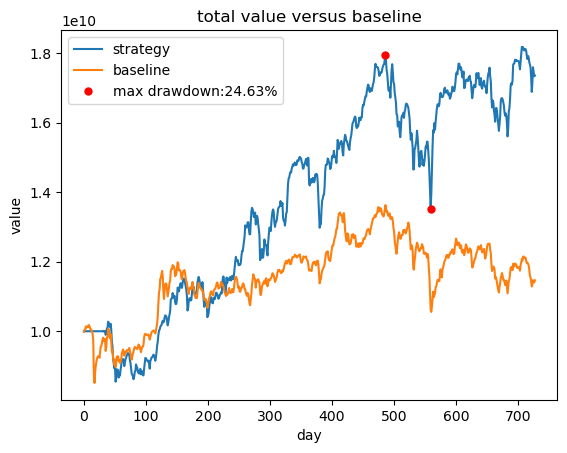

In [3]:
#创建清洗器、日志解析器
cleaner = Cleaner()
plumber = Plumber()
#清洗数据
data = cleaner.clean(daily)
#设置回测参数
args = {
    'data': data,
    'strategy': MyStrategy(),
    'start_day': datetime.datetime(2020,1,1),
    'end_day': datetime.datetime(2022,12,31),
}
#挂载引擎
engine = Engine(args)
#开始回测
log = engine.backtest()
#解析日志
plumber.parse_log(log)